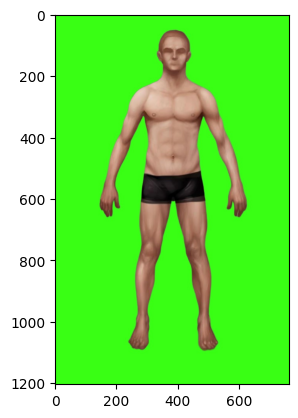

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('image.png')

plt.imshow(img)



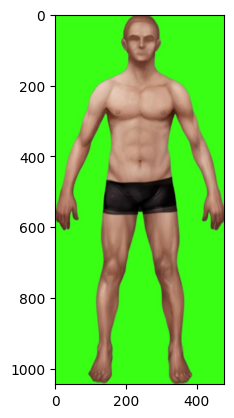

In [19]:
import cv2
import matplotlib
import numpy as np

img = cv2.imread('image.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Perform Canny edge detection
edges = cv2.Canny(blurred, threshold1=30, threshold2=150)

# Find coordinates of non-zero (edge) pixels
edge_coords = np.column_stack(np.where(edges > 0))

# Get top, bottom, left, and right coordinates
top = np.min(edge_coords[:, 0])
bottom = np.max(edge_coords[:, 0])
left = np.min(edge_coords[:, 1])
right = np.max(edge_coords[:, 1])

# Draw bounding box on a copy of the original image
cropped_result = img[top:bottom, left:right]

# Display the original and cropped images
plt.imshow(cv2.cvtColor(cropped_result, cv2.COLOR_BGR2RGB))

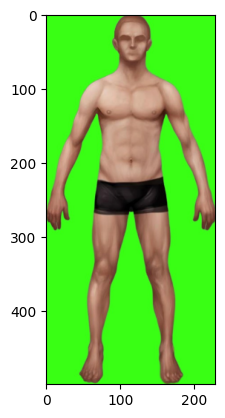

In [22]:
import cv2

image = cropped_result

# Target height for resizing
target_height = 500

# Calculate the aspect ratio
aspect_ratio = image.shape[1] / image.shape[0]

# Calculate the new width based on the target height and aspect ratio
target_width = int(target_height * aspect_ratio)

# Resize the image
resized_image = cv2.resize(image, (target_width, target_height))

# Display the original and resized images
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

In [23]:
import cv2
import numpy as np

image = resized_image

# Convert the image from BGR to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds for detecting green color in HSV
lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

# Create a mask for green pixels using the defined bounds
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Count the number of non-zero (green) pixels in the mask
green_pixel_count = np.count_nonzero(green_mask)

print(f"Total number of green pixels: {green_pixel_count}")

# Count human pixels
print(f"Total number of human pixels: {(resized_image.shape[0]*resized_image.shape[1])-green_pixel_count}")

Total number of green pixels: 73836
Total number of human pixels: 40664
